<a href="https://colab.research.google.com/github/nandivardhan522/PyTorch-Totorial/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# create a model class that ingerits a nn.Module
class Model(nn.Module):
  # Input Layer ( 4 features of the flower)
  #-- > hidden layer1(number of neurons)
  #--> H2(n)
  #--> output (3 classes of flowers)

  def __init__(self,in_features = 4, h1 =8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a maual seed for randomization
torch.manual_seed(41)

#create an instance for the model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://raw.githubusercontent.com/amberkakkar01/IRIS-Flower-classification/refs/heads/master/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [7]:
my_df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
my_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
# Change Last Column from strings to integers
my_df['Species'] = my_df['Species'].replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0})

/tmp/ipython-input-4091089537.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['Species'] = my_df['Species'].replace({'setosa':0.0,'versicolor':1.0,'virginica':2.0})


In [10]:
my_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
my_df['Species'].unique()

array([0., 1., 2.])

In [12]:
#Train Test Split! Set X, y
X = my_df.drop(['Species'],axis=1).values
y = my_df['Species'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [15]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
#set the criterion of the model to measure the error, how far off the predictions are from
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer , learning rate (if error doesn't go down after the bunch of iterations(epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [18]:
#Train our model
# Epochs (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.item())
  if i % 10 ==0:
    print(f"Epoch: {i} Loss:{loss}")

  #do some back propagation: take the error rate forward propagation and feed it back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss:1.1259268522262573
Epoch: 10 Loss:1.020915150642395
Epoch: 20 Loss:0.8362472653388977
Epoch: 30 Loss:0.5955954194068909
Epoch: 40 Loss:0.4022768437862396
Epoch: 50 Loss:0.274393230676651
Epoch: 60 Loss:0.1889522224664688
Epoch: 70 Loss:0.13438701629638672
Epoch: 80 Loss:0.1007767915725708
Epoch: 90 Loss:0.080393947660923


Text(0.5, 0, 'Epoch')

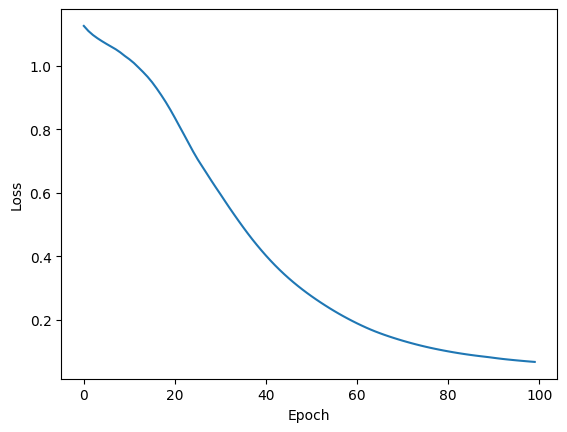

In [19]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [20]:
#Evaluate model on test data set


In [21]:
# Turn off gradients for evaluation
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

print(f'Loss on test set: {loss.item()}')

# Get the predictions (the class with the highest probability)
predicted = torch.max(y_eval.data, 1)[1]

# Calculate accuracy
correct = (predicted == y_test).sum().item()
accuracy = correct / len(y_test)

print(f'Accuracy on test set: {accuracy}')

Loss on test set: 0.07596978545188904
Accuracy on test set: 1.0


In [22]:
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(data.numpy()):28} {y_val.argmax().item()}')

        #correct or not
        if y_val.argmax().item() == y_test[i]:
            print('Correct')
        else:
            print('Wrong')
        print('-'*60)

print(f'Loss on train set: {loss.item()}')

 1. [5.7 2.9 4.2 1.3]            1
Correct
------------------------------------------------------------
 2. [6.7 3.1 4.4 1.4]            1
Correct
------------------------------------------------------------
 3. [4.7 3.2 1.6 0.2]            0
Correct
------------------------------------------------------------
 4. [6.5 2.8 4.6 1.5]            1
Correct
------------------------------------------------------------
 5. [6.1 2.6 5.6 1.4]            2
Correct
------------------------------------------------------------
 6. [6.3 3.3 6.  2.5]            2
Correct
------------------------------------------------------------
 7. [4.8 3.4 1.9 0.2]            0
Correct
------------------------------------------------------------
 8. [5.1 3.5 1.4 0.3]            0
Correct
------------------------------------------------------------
 9. [6.4 3.1 5.5 1.8]            2
Correct
------------------------------------------------------------
10. [6.9 3.2 5.7 2.3]            2
Correct
---------------------

In [23]:
#Evaluate with new data
new_iris = torch.tensor([[4.7,3.2,1.3,0.2]])

In [24]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([[ 6.1275, -2.7454, -5.4112]])
0


In [25]:
#Save and load our model
torch.save(model.state_dict(), 'my_model.pt')

In [26]:
new_model = Model()
new_model.load_state_dict(torch.load('my_model.pt'))

<All keys matched successfully>

In [27]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)